In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Exploring the dataset

In [3]:
df_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [4]:
df_test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [5]:
print("Shape of traning data: ", df_train.shape)
print("Shape of testing data: ", df_test.shape)

Shape of traning data:  (137, 43)
Shape of testing data:  (100000, 42)


In [6]:
df_train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [7]:
# Returns basic information on all columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [8]:
# Returns basic statistics on numeric columns
df_train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [9]:
# Returns basic statistics on categorical columns
df_train.describe(include = 'object')

,Open Date,City,City Group,Type
count,137,137,137,137
unique,134,34,2,3
top,02/02/2012,İstanbul,Big Cities,FC
freq,2,50,78,76


In [10]:
df_train['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [11]:
df_train['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

In [12]:
df_train['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

## Data Cleaning

In [13]:
Train_ID = df_train['Id'].copy()
Test_ID = df_test['Id'].copy()

In [14]:
# Removing the 'Id' column from training and testing data
df_train.drop(labels = 'Id', axis = 1, inplace = True)
df_test.drop(labels = 'Id', axis = 1, inplace = True)

In [15]:
print(df_train.columns)
print('-'*20)
print(df_test.columns)

Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue'],
      dtype='object')
--------------------
Index(['Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37'],
      dtype='object')


**Checking for missing values in training and testing data**

In [16]:
# Returns true for a column having null values, else false
df_train.isnull().any()

Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
revenue       False
dtype: bool

In [17]:
# Returns true for a column having null values, else false
df_test.isnull().any()

Open Date     False
City          False
City Group    False
Type          False
P1            False
P2            False
P3            False
P4            False
P5            False
P6            False
P7            False
P8            False
P9            False
P10           False
P11           False
P12           False
P13           False
P14           False
P15           False
P16           False
P17           False
P18           False
P19           False
P20           False
P21           False
P22           False
P23           False
P24           False
P25           False
P26           False
P27           False
P28           False
P29           False
P30           False
P31           False
P32           False
P33           False
P34           False
P35           False
P36           False
P37           False
dtype: bool

In [18]:
from datetime import datetime as dt
# Converting Open_Date into day count.
df_train['Days_Open'] = (dt.now() - pd.to_datetime(df_train['Open Date'])).dt.days
df_test['Days_Open'] = (dt.now() - pd.to_datetime(df_test['Open Date'])).dt.days

In [19]:
# Removing the 'Open Date' column from training and testing data
df_train.drop(labels = 'Open Date', axis = 1, inplace = True)
df_test.drop(labels = 'Open Date', axis = 1, inplace = True)

In [20]:
df_train.head()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Days_Open
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,...,5,3,4,5,5,4,3,4,5653753.0,7662
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,...,0,0,0,0,0,0,0,0,6923131.0,4528
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,...,0,0,0,0,0,0,0,0,2055379.0,2678
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,...,25,12,10,6,18,12,12,6,2675511.0,3079
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,...,5,1,3,2,3,4,3,3,4316715.0,4078


## Visualizations and Feature Relations

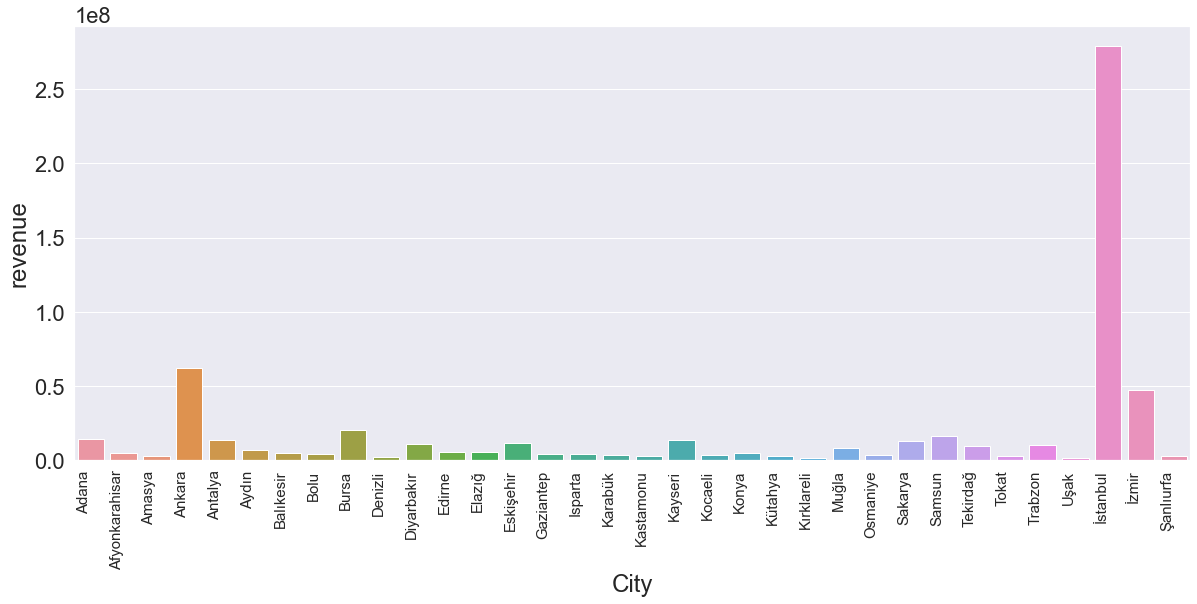

In [26]:
fig = plt.subplots(figsize = (20, 8))
data_1 = df_train[['City', 'revenue']].groupby('City').revenue.sum().reset_index()
chart = sns.barplot(x = 'City', y = 'revenue', data = data_1)
chart.set_xticklabels(chart.get_xticklabels(), fontsize = 15, rotation = 90, horizontalalignment = 'right')
sns.set(font_scale = 2)

Above bar plot shows the distribution of revenue as per city.<br>
Instanbul is making the most revenues compared to other cities.<br>
Istanbul, Izmair, Ankara are good place for opening a restaurant and making renveue.

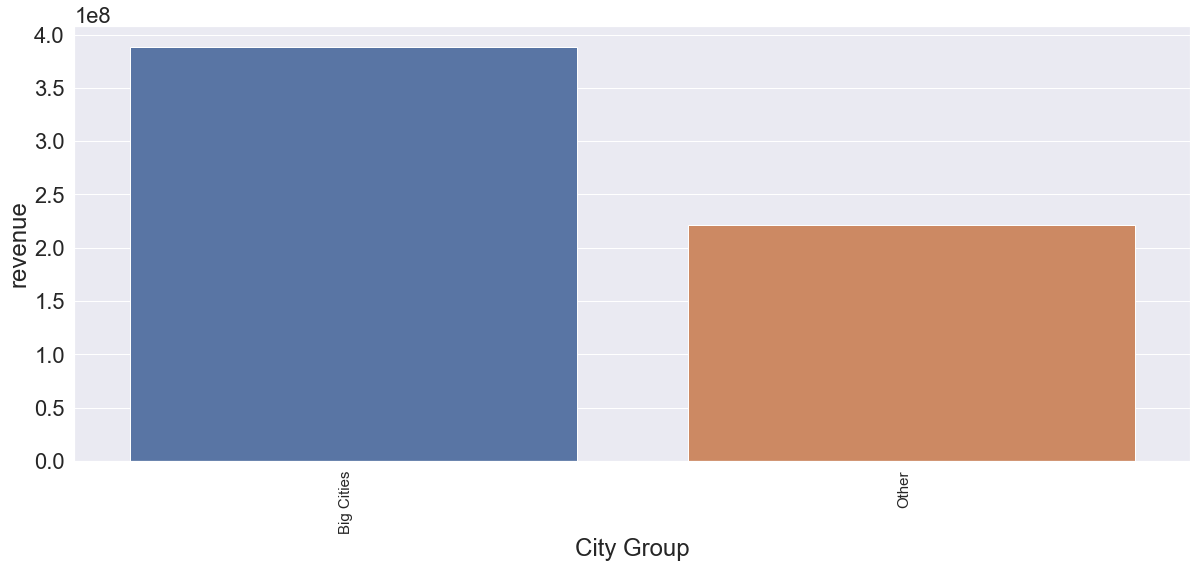

In [22]:
fig = plt.subplots(figsize = (20, 8))
data_1 = df_train[['City Group', 'revenue']].groupby('City Group').revenue.sum().reset_index()
chart = sns.barplot(x = 'City Group', y = 'revenue', data = data_1)
chart.set_xticklabels(chart.get_xticklabels(), fontsize = 15, rotation = 90, horizontalalignment = 'right')
sns.set(font_scale = 2)

The Big Cities are making more revenues than smaller cities yet the gap between them is narrow.

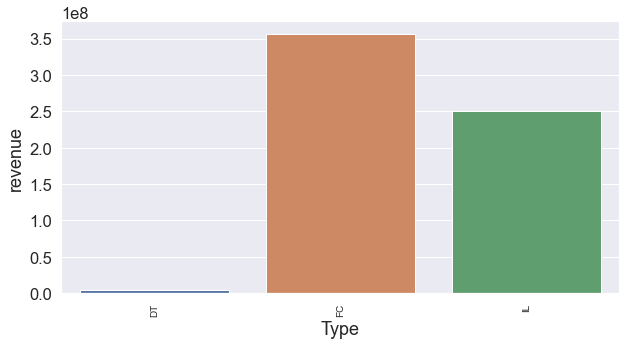

In [28]:
fig = plt.subplots(figsize = (10, 5))
data_1 = df_train[['Type', 'revenue']].groupby('Type').revenue.sum().reset_index()
chart = sns.barplot(x = 'Type', y = 'revenue', data = data_1)
chart.set_xticklabels(chart.get_xticklabels(), fontsize = 10, rotation = 90)
sns.set(font_scale = 1.5)

Above bar plot shows the distribution of Type of the restaurant and revenue.<br>
Type FC i.e. Food Court is the better type for making revenue.

## Exploratory Data Analysis

Skewness: 2.793479


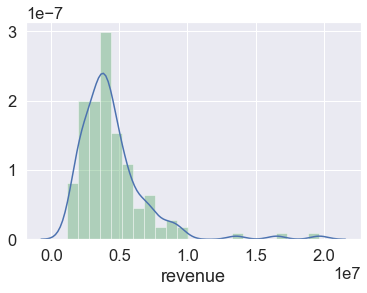

In [29]:
sns.distplot(df_train['revenue'], color = 'b', hist_kws={"color": "g"})
print("Skewness: %f" %df_train['revenue'].skew())

As we see, the target variable 'revenue' is not normally distributed.<br>
This can reduce the performance of the ML regression models.<br>
Therfore we make log transformation, resulting better distribution model.

Skewness: 0.307402


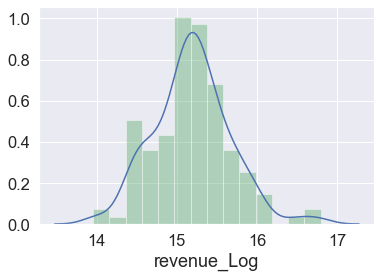

In [30]:
df_train['revenue_Log'] = np.log(df_train['revenue'])
sns.distplot(df_train['revenue_Log'], color = 'b', hist_kws={"color": "g"})
print("Skewness: %f" %df_train['revenue_Log'].skew())

In [31]:
df_train.drop(labels = 'revenue', axis = 1, inplace = True)

### Relation to 'revenue' for all numerical features

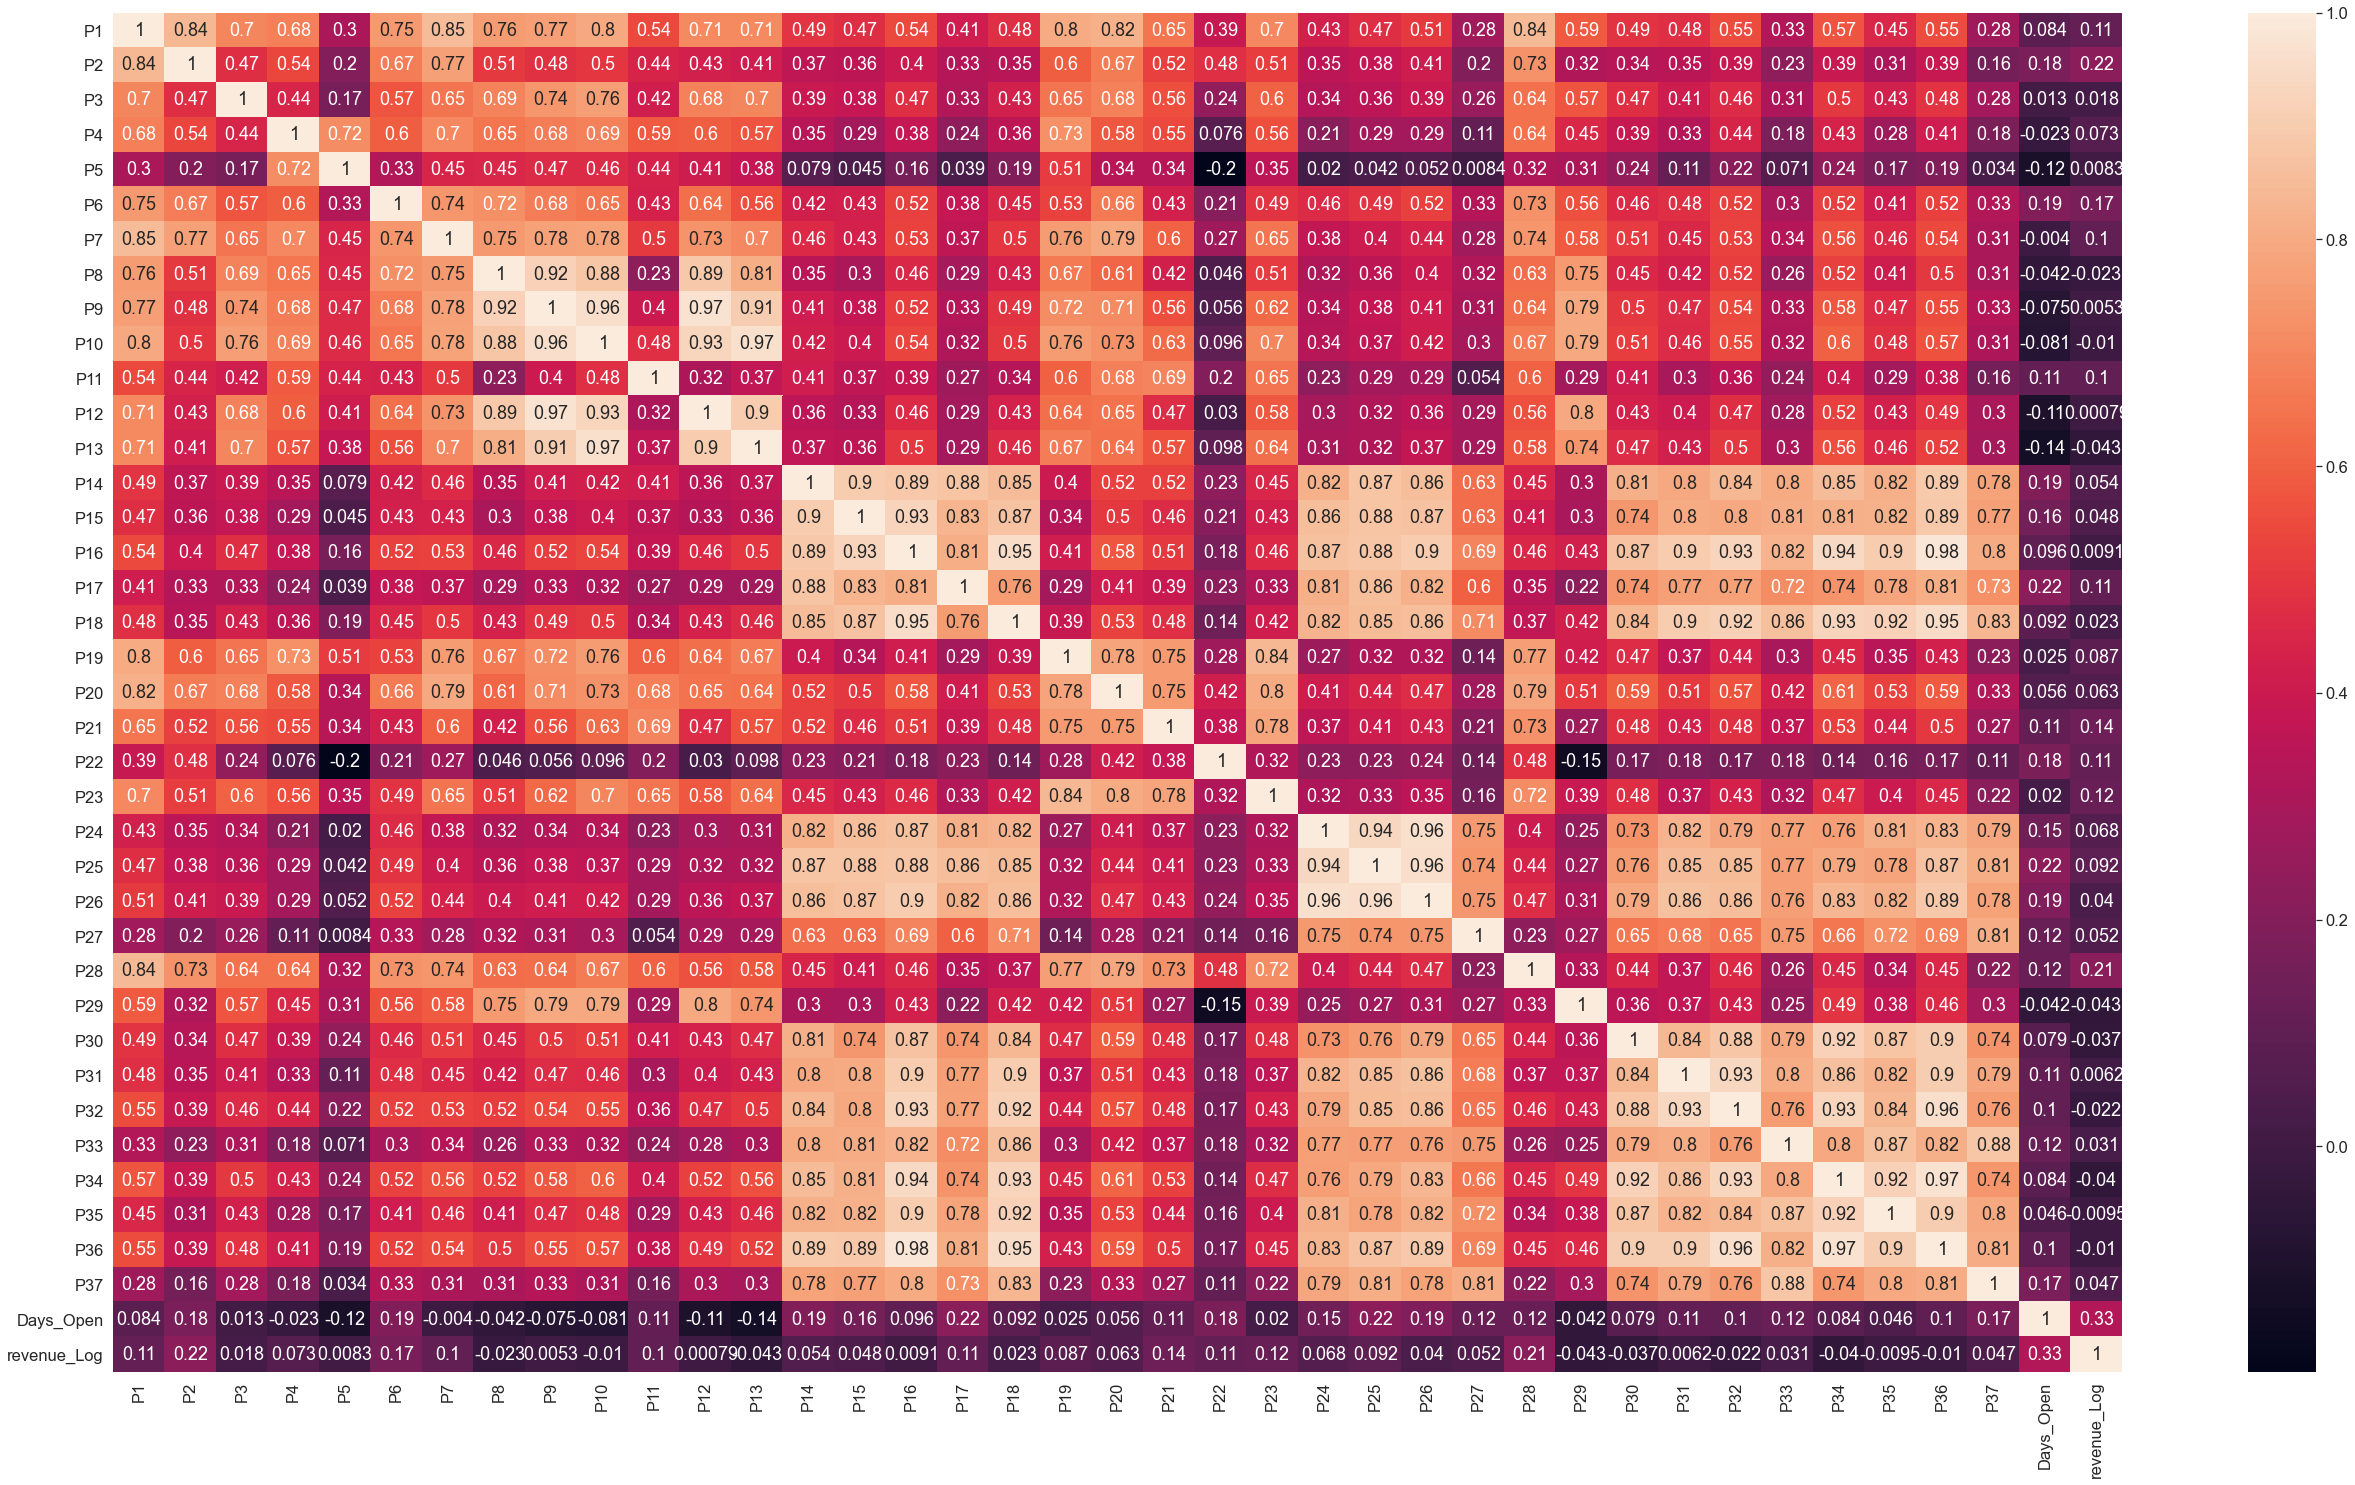

In [32]:
plt.figure(figsize=(45,25))
sns.heatmap(df_train.corr(), annot = True)

As the heatmap clearly shows that there is no obvious relation between numerical variables independtly with the target ('revenue').

### Relation to 'revenue' for all categorical features

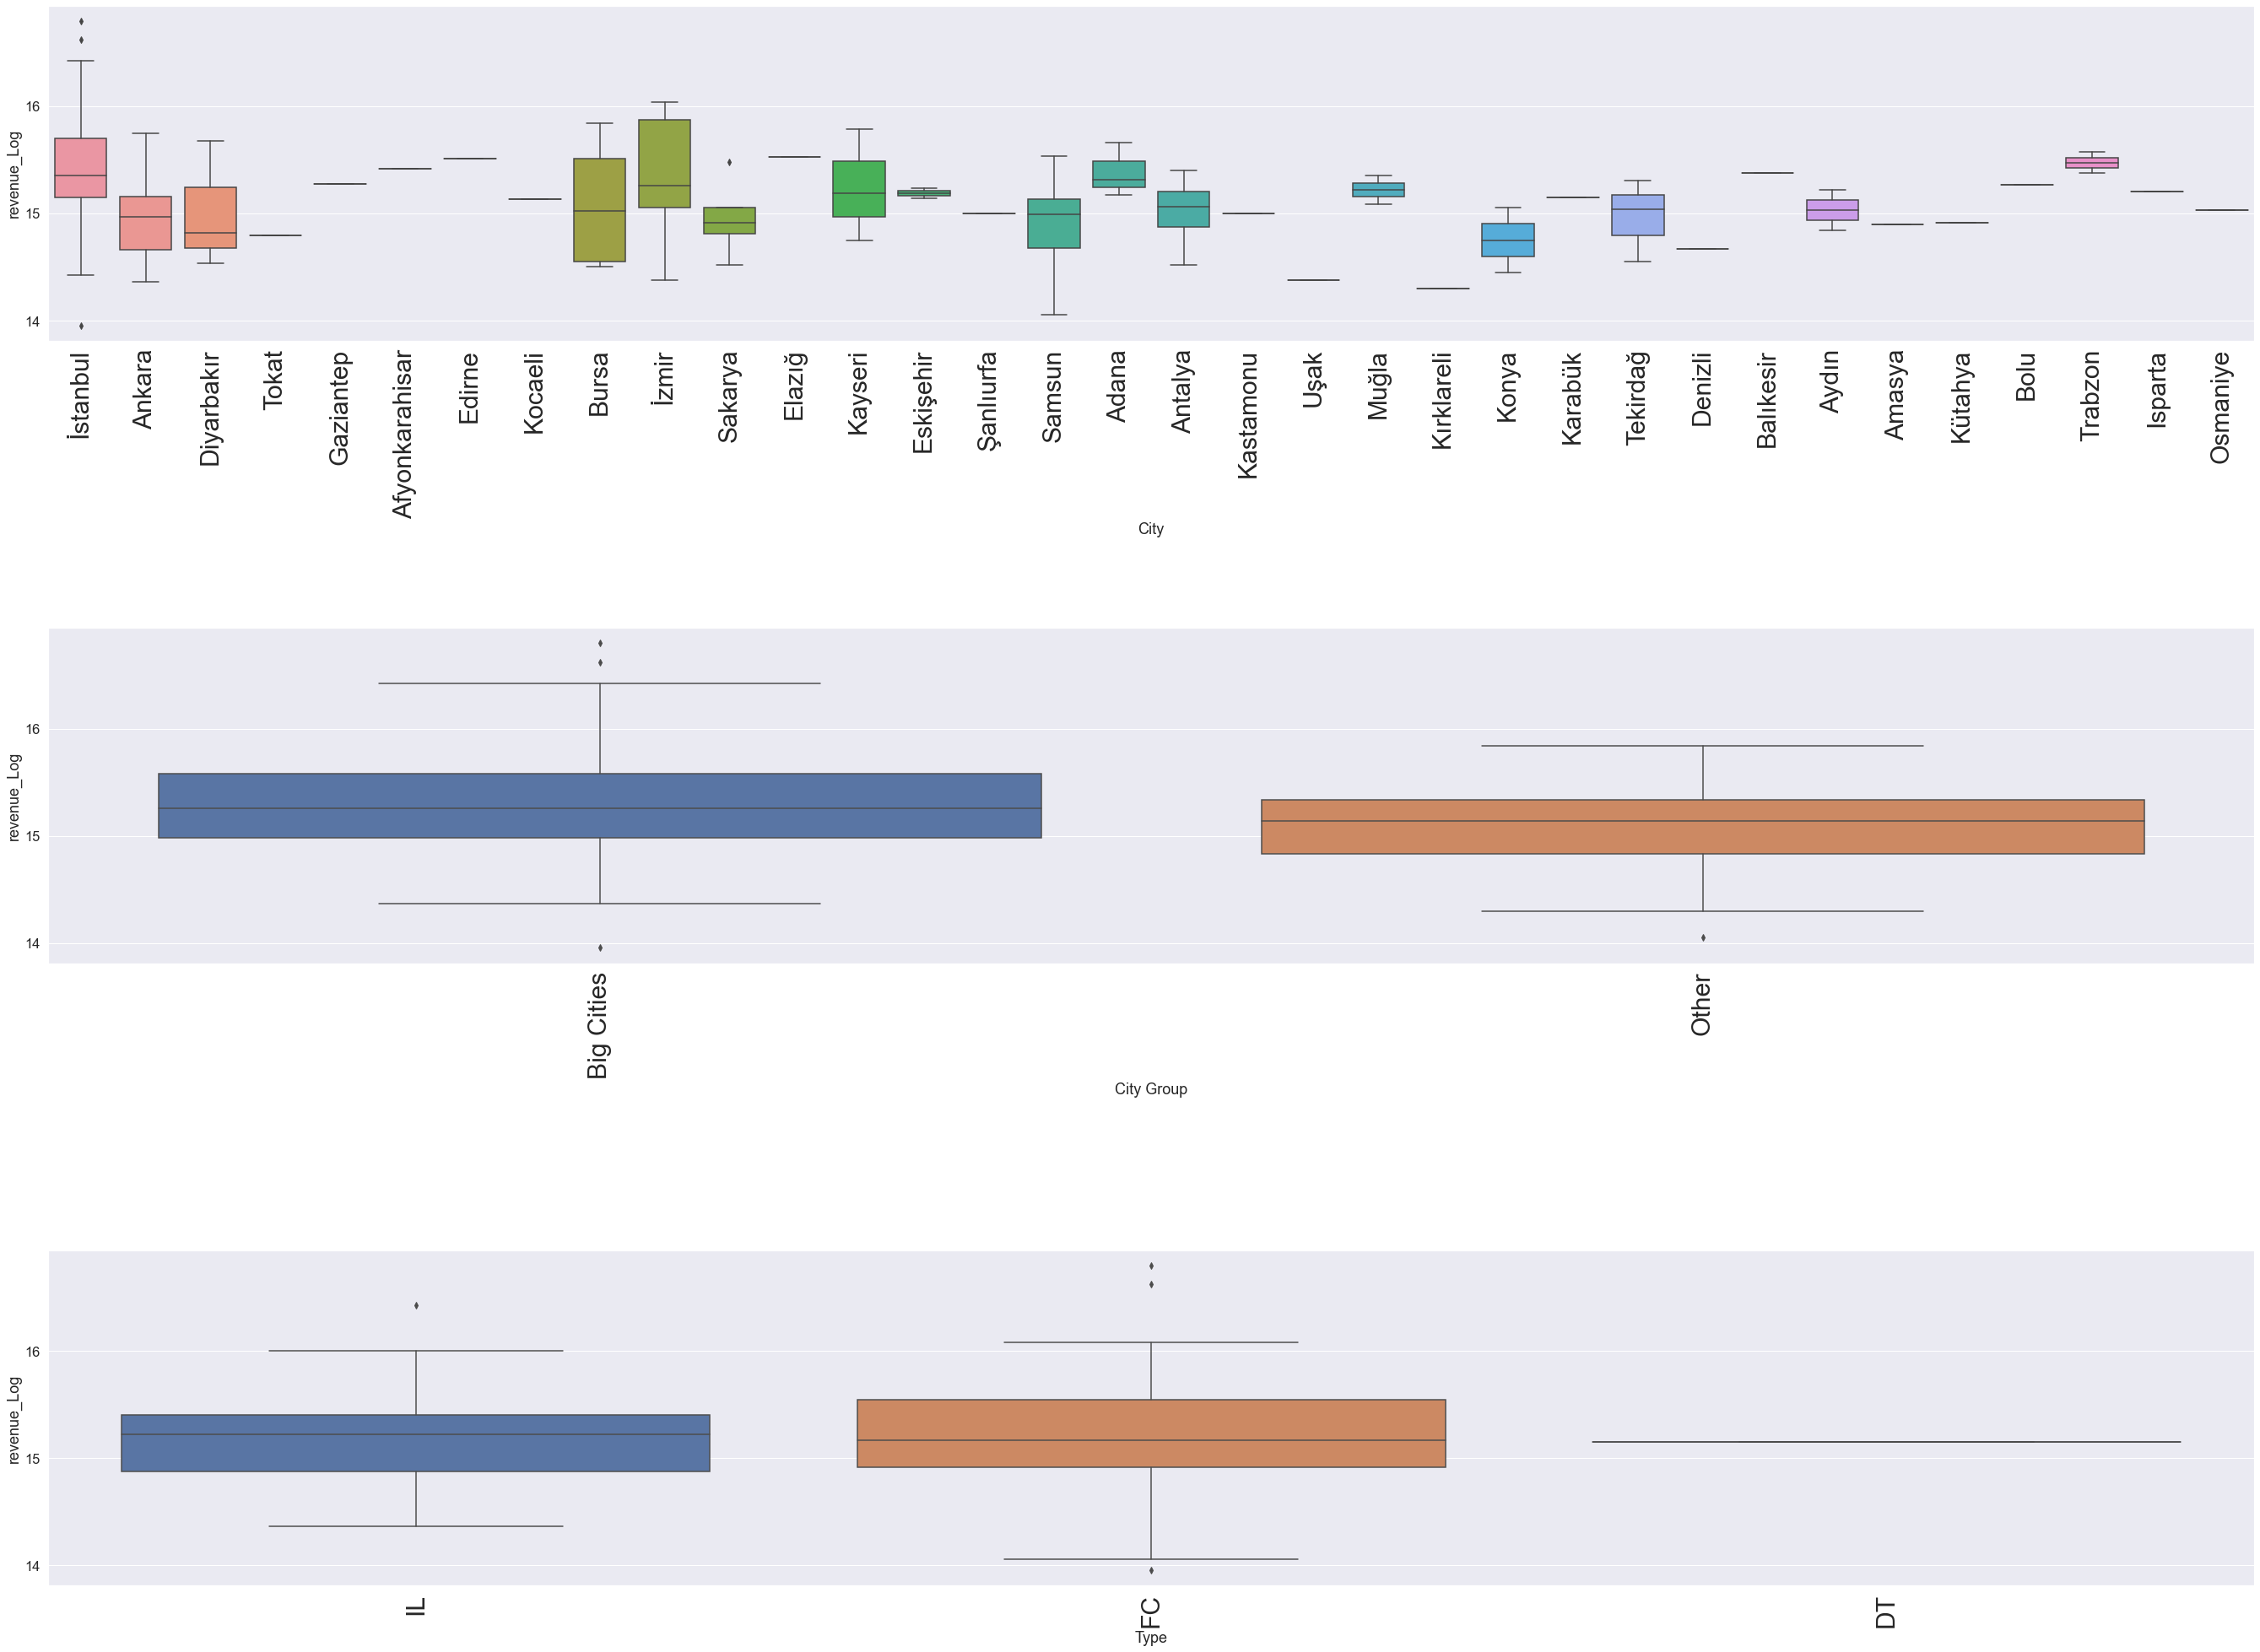

In [33]:
fig, ax = plt.subplots(3, 1, figsize = (40, 30))
categorical_features = ['City', 'City Group', 'Type']
for var, subplot in zip(categorical_features, ax.flatten()):
    chart = sns.boxplot(x = var, y = 'revenue_Log', data = df_train, ax = subplot)
    chart.set_xticklabels(chart.get_xticklabels(), fontsize = 30, rotation = 90)
    plt.tight_layout(pad = 3.0)
    sns.set(font_scale = 3)

The above box plots shows, best places to invest money and the worst and which types of resturant are more likely to make money than others.<br>
City of Izmair has a wider range of distributed values in revneue with slighly lower median than istanbul, Ankara.

## Feature Engineering

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
one = OneHotEncoder()

**1. City Group**

In [35]:
df_train['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

City Group is categorical data so we can replace 'Big Cities' to 1 and 'Other' to 0.

In [36]:
df_train['Big Cities'] = np.where(df_train['City Group'] == 'Big Cities', 1, 0)
df_train.drop(columns = 'City Group', inplace = True)
df_test['Big Cities'] = np.where(df_test['City Group'] == 'Big Cities', 1, 0)
df_test.drop(columns = 'City Group', inplace = True)

**2. Type**

In [37]:
df_train['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [38]:
df_test['Type'].unique()

array(['FC', 'IL', 'DT', 'MB'], dtype=object)

In [39]:
df_train['Type_IL'] = np.where(df_train['Type'] == 'IL', 1, 0)
df_train['Type_FC'] = np.where(df_train['Type'] == 'FC', 1, 0)
df_train['Type_DT'] = np.where(df_train['Type'] == 'DT', 1, 0)
df_train['Type_MB'] = np.where(df_train['Type'] == 'MB', 1, 0)
df_train.drop(columns = 'Type', inplace = True)

df_test['Type_IL'] = np.where(df_test['Type'] == 'IL', 1, 0)
df_test['Type_FC'] = np.where(df_test['Type'] == 'FC', 1, 0)
df_test['Type_DT'] = np.where(df_test['Type'] == 'DT', 1, 0)
df_test['Type_MB'] = np.where(df_test['Type'] == 'MB', 1, 0)
df_test.drop(columns = 'Type', inplace = True)

**3. City**

In [40]:
df_train['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [41]:
df_train.City=le.fit_transform(df_train.City)
df_test.City=le.fit_transform(df_test.City)

In [42]:
df_train.head()

,City,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P35,P36,P37,Days_Open,revenue_Log,Big Cities,Type_IL,Type_FC,Type_DT,Type_MB
0,31,4,5.0,4.0,4.0,2,2,5,4,5,...,4,3,4,7662,15.547830,1,1,0,0,0
1,3,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,4528,15.750379,1,0,1,0,0
2,10,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,2678,14.535971,0,1,0,0,0
3,28,6,4.5,6.0,6.0,4,4,10,8,10,...,12,12,6,3079,14.799651,0,1,0,0,0
4,14,3,4.0,3.0,4.0,2,2,5,5,5,...,4,3,3,4078,15.278005,0,1,0,0,0


In [43]:
df_test.head()

,City,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P34,P35,P36,P37,Days_Open,Big Cities,Type_IL,Type_FC,Type_DT,Type_MB
0,38,1,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,3455,0,0,1,0,0
1,27,3,4.0,4.0,4.0,2,2,5,3,4,...,0,0,0,0,3400,0,1,0,0,0
2,3,3,4.0,4.0,4.0,2,2,5,4,4,...,0,0,0,0,2443,1,0,1,0,0
3,26,2,4.0,4.0,4.0,2,3,5,4,5,...,0,0,0,0,2620,0,1,0,0,0
4,1,2,4.0,4.0,4.0,1,2,5,4,5,...,0,0,0,0,2534,0,0,1,0,0


## Model, predict and solve

In [44]:
print("Train :",df_train.shape)
print("Test:",df_test.shape)

Train : (137, 45)
Test: (100000, 44)


In [45]:
X = df_train.drop('revenue_Log', axis = 1)
y = df_train['revenue_Log']

In [46]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [47]:
X_train.shape

(102, 44)

In [48]:
X_test.shape

(35, 44)

In [49]:
y_train.shape

(102,)

In [50]:
y_test.shape

(35,)

### Model Building

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, rf_predictions))
print(RMSE)

0.4257403324193407


In [52]:
scoreOfModel = rf_model.score(X_train, y_train)
print("Score is calculated as: ",scoreOfModel*100)

Score is calculated as:  87.75019204010914


In [53]:
test_data = df_test.copy()
pred2 = rf_model.predict(test_data)
pred2 = np.exp(pred2)

In [54]:
submission_randomforest = pd.DataFrame({
        "Id": Test_ID,
        "Prediction": pred2
    })
#submission.to_csv('RandomForest.csv',header = True, index = False)

In [55]:
submission_randomforest.head()

,Id,Prediction
0,0,5.234462e+06
1,1,3.852503e+06
2,2,2.970634e+06
3,3,3.260915e+06
4,4,2.994340e+06


In [56]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from math import sqrt

params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
GBR = ensemble.GradientBoostingRegressor(**params)

GBR.fit(X_train, y_train)
preds_GBR = GBR.predict(X_test)

GradientBoostingRegressor_RMSE= sqrt(mean_squared_error(y_test, preds_GBR))
print('Root Mean squared error {}'.format(GradientBoostingRegressor_RMSE))

Root Mean squared error 0.438126104511697


In [57]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
                     'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 
                                       0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
                    }]
gsearch = GridSearchCV(estimator = XGBRegressor(),
                       param_grid = parameters, 
                       scoring ='neg_mean_absolute_error',
                       n_jobs = 4, cv = 5)

gsearch.fit(X_train,y_train)
gsearch.best_params_, gsearch.best_score_

({'learning_rate': 0.3, 'n_estimators': 100}, -0.35985764361235206)

In [58]:
final_model = XGBRegressor(n_estimators = gsearch.best_params_.get('n_estimators'), 
                           learning_rate = gsearch.best_params_.get('learning_rate'), 
                           n_jobs = 4)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
pred_test = final_model.predict(X_test)
RMSE = sqrt(mean_squared_error(y_test, pred_test))
print(RMSE)

0.4643814884085505


In [60]:
scoreOfModel = final_model.score(X_train, y_train)
print("Score is calculated as: ",scoreOfModel*100)

Score is calculated as:  99.99965055864077


In [61]:
test_data = df_test.copy()
pred2 = final_model.predict(test_data)
pred2 = np.exp(pred2)

In [62]:
submission = pd.DataFrame({
        "Id": Test_ID,
        "Prediction": pred2
    })
submission.to_csv('Submission.csv',header = True, index = False)
submission.head()

,Id,Prediction
0,0,4585958.00
1,1,3927807.00
2,2,3255313.25
3,3,3333044.75
4,4,2775967.00
